
# PART1

## 1. Import required libraries and read the dataset.


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [49]:
df=pd.read_csv('Apps_data.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [5]:
df.shape

(10841, 13)

In [16]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.

In [18]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Check if there are any duplicate records in the dataset? if any drop them

In [27]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [50]:
df.drop_duplicates(inplace=True)

In [51]:
df.shape

(10358, 13)

## 5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.


In [39]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [52]:
dum=df['Category']=='1.9'
df[dum]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [53]:
df.drop(10472, inplace=True)

In [54]:
df.shape

(10357, 13)

## 6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [63]:
lst1=list(df[df["Rating"].isnull()].index)

In [64]:
df.drop(lst1,inplace=True)

In [66]:
df.shape

(8892, 13)

In [67]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [70]:
df['Rating_category'] = df['Rating'].apply(lambda x: "High" if x>3.5 else "Low")

## 7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution

<AxesSubplot:ylabel='Rating_category'>

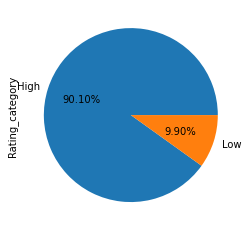

In [82]:
df['Rating_category'].value_counts().plot(kind='pie', autopct="%.2f%%")

90.10% of Apps are having high rating and only 9.90% of Apps having low rating

Text(0.5, 1.0, 'Distribution of Rating_category')

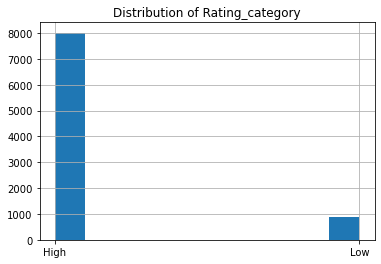

In [86]:
df["Rating_category"].hist()
plt.title("Distribution of Rating_category")

## 8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [90]:
df['Reviews'] = pd.to_numeric(df.Reviews)

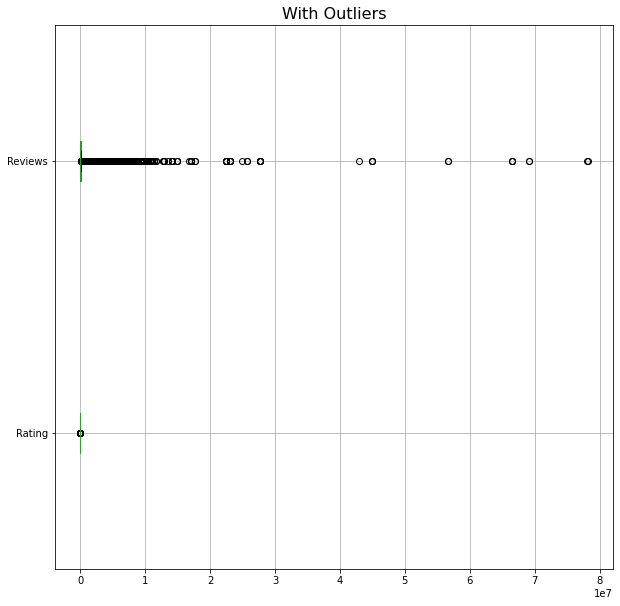

In [97]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [99]:
df['Reviews'].skew()

16.207669086966867

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

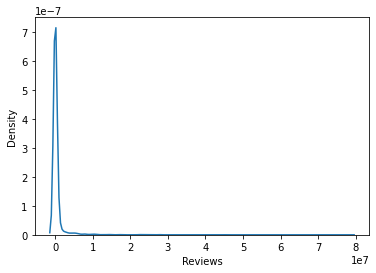

In [100]:
sns.kdeplot(df['Reviews'])

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

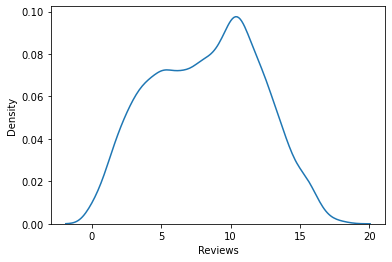

In [102]:
sns.kdeplot(np.log(df['Reviews']))

In [104]:
df['Reviews']=np.log(df['Reviews'])

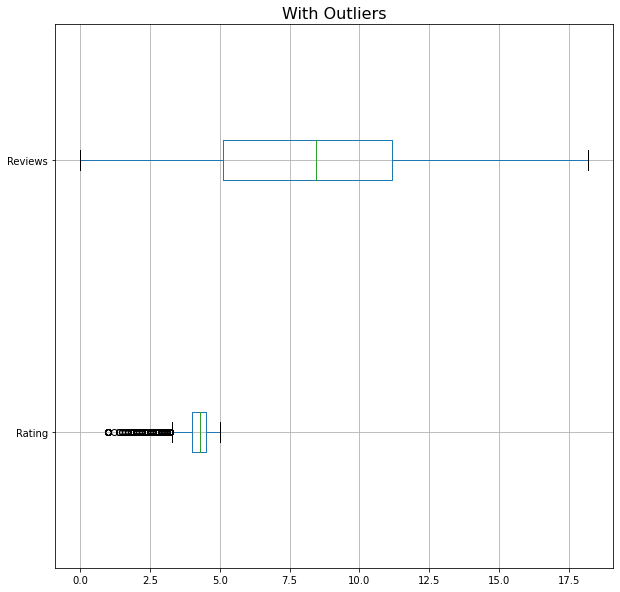

In [108]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

## 9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [111]:
df['Size']=df['Size'].str.replace('M','e6')
df['Size']=df['Size'].str.replace('K','e6')
df['Size']=pd.to_numeric(df['Size'],errors="coerce")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,5.068904,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,6.874198,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,11.379508,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,12.281384,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,6.874198,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


In [116]:
df.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size               1725
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver           4
Android Ver           2
Rating_category       0
dtype: int64

In [117]:
df=df[df['Size'].notnull()]
df.shape

(7167, 14)

In [118]:
df.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        3
Android Ver        2
Rating_category    0
dtype: int64

## 10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.

In [119]:
df["Installs"]=df["Installs"].replace({"\\,":"","\\+":""},regex=True)
df["Installs"]=pd.to_numeric(df.Installs,errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7167 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   App              7167 non-null   object 
 1   Category         7167 non-null   object 
 2   Rating           7167 non-null   float64
 3   Reviews          7167 non-null   float64
 4   Size             7167 non-null   float64
 5   Installs         7167 non-null   int64  
 6   Type             7167 non-null   object 
 7   Price            7167 non-null   object 
 8   Content Rating   7167 non-null   object 
 9   Genres           7167 non-null   object 
 10  Last Updated     7167 non-null   object 
 11  Current Ver      7164 non-null   object 
 12  Android Ver      7165 non-null   object 
 13  Rating_category  7167 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 839.9+ KB


<ipython-input-119-1fc5eecc8221>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Installs"]=df["Installs"].replace({"\\,":"","\\+":""},regex=True)
<ipython-input-119-1fc5eecc8221>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Installs"]=pd.to_numeric(df.Installs,errors="coerce")


## 11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [ ]:
df.Price.unique()

In [120]:
df["Price"]=df["Price"].str.replace("$","")
df.Price=pd.to_numeric(df.Price)
df.describe()

<ipython-input-120-fa6dde0d0a5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Price"]=df["Price"].str.replace("$","")
C:\Users\sagar\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Rating,Reviews,Size,Installs,Price
count,7167.000000,7167.000000,7.167000e+03,7.167000e+03,7167.000000
mean,4.177410,7.685271,2.354796e+07,8.086405e+06,1.076227
std,0.549583,3.746643,2.346010e+07,4.710472e+07,17.392762
min,1.000000,0.000000,1.000000e+06,1.000000e+00,0.000000
25%,4.000000,4.677480,5.700000e+06,1.000000e+04,0.000000
50%,4.300000,7.765993,1.500000e+07,1.000000e+05,0.000000
75%,4.500000,10.568736,3.400000e+07,1.000000e+06,0.000000
max,5.000000,17.619812,1.000000e+08,1.000000e+09,400.000000


## 12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)

In [121]:
col=['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver']
df.drop(col,axis=1,inplace=True)
df.head()

C:\Users\sagar\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,6.874198,2800000.0,100000,Free,0.0,Everyone,High


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7167 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7167 non-null   object 
 1   Reviews          7167 non-null   float64
 2   Size             7167 non-null   float64
 3   Installs         7167 non-null   int64  
 4   Type             7167 non-null   object 
 5   Price            7167 non-null   float64
 6   Content Rating   7167 non-null   object 
 7   Rating_category  7167 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 503.9+ KB


## 13. Encode the categorical columns.


In [123]:
df.describe(include=object)

,Category,Type,Content Rating,Rating_category
count,7167,7167,7167,7167
unique,33,2,6,2
top,FAMILY,Free,Everyone,High
freq,1569,6670,5709,6385


In [124]:
df=pd.get_dummies(df,columns=(["Category","Type","Content Rating"]),drop_first=True)

In [125]:
df["Rating_category"]=df["Rating_category"].apply(lambda x:1 if x=="high" else 0)

In [126]:
df

,Reviews,Size,Installs,Price,Rating_category,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.068904,19000000.0,10000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6.874198,14000000.0,500000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,11.379508,8700000.0,5000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,12.281384,25000000.0,50000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6.874198,2800000.0,100000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,6.781058,2300000.0,100000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10834,1.945910,2600000.0,500,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,3.637586,53000000.0,5000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,1.386294,3600000.0,100,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## 14. Segregate the target and independent features (Hint: Use Rating_category as the target)

In [129]:
x=df.drop(["Rating_category"],axis=1)
x

,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,5.068904,19000000.0,10000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,6.874198,14000000.0,500000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,11.379508,8700000.0,5000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,12.281384,25000000.0,50000000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6.874198,2800000.0,100000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10830,6.781058,2300000.0,100000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10834,1.945910,2600000.0,500,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10836,3.637586,53000000.0,5000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10837,1.386294,3600000.0,100,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [131]:
y=df["Rating_category"]
y

0        0
1        0
2        0
3        0
4        0
        ..
10830    0
10834    0
10836    0
10837    0
10840    0
Name: Rating_category, Length: 7167, dtype: int64

## 15. Split the dataset into train and test

In [132]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

In [133]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5733, 42)
(1434, 42)
(5733,)
(1434,)


## 16. Standardize the data, so that the values are within a particular range.


In [134]:
model=MinMaxScaler()
print(model)

MinMaxScaler()


In [135]:
df2=pd.DataFrame(model.fit_transform(df),columns=df.columns)
df2.head()

,Reviews,Size,Installs,Price,Rating_category,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,0.287682,0.181818,0.00001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.390140,0.131313,0.00050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.645836,0.077778,0.00500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.697021,0.242424,0.05000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.390140,0.018182,0.00010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
